In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Direct download URL from Google Drive
url = 'https://drive.google.com/uc?id=1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U'

# Read CSV into DataFrame
df = pd.read_csv(url)




In [8]:
# Set up visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [11]:
# Load data and encode properly
df['Date'] = pd.to_datetime(df['Date'])
df['Engine'] = df['Engine'].str.encode('ascii', 'ignore').str.decode('ascii')

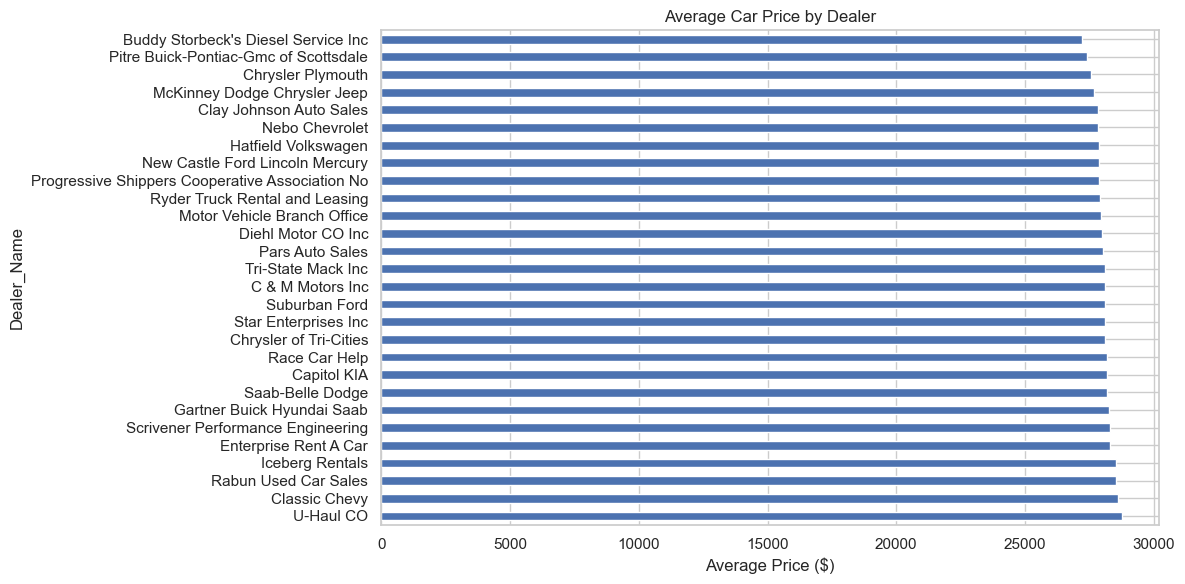

In [13]:
# ========== 1. Average Selling Price by Dealer ==========
df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Average Car Price by Dealer')
plt.xlabel('Average Price ($)')
plt.tight_layout()
plt.show()

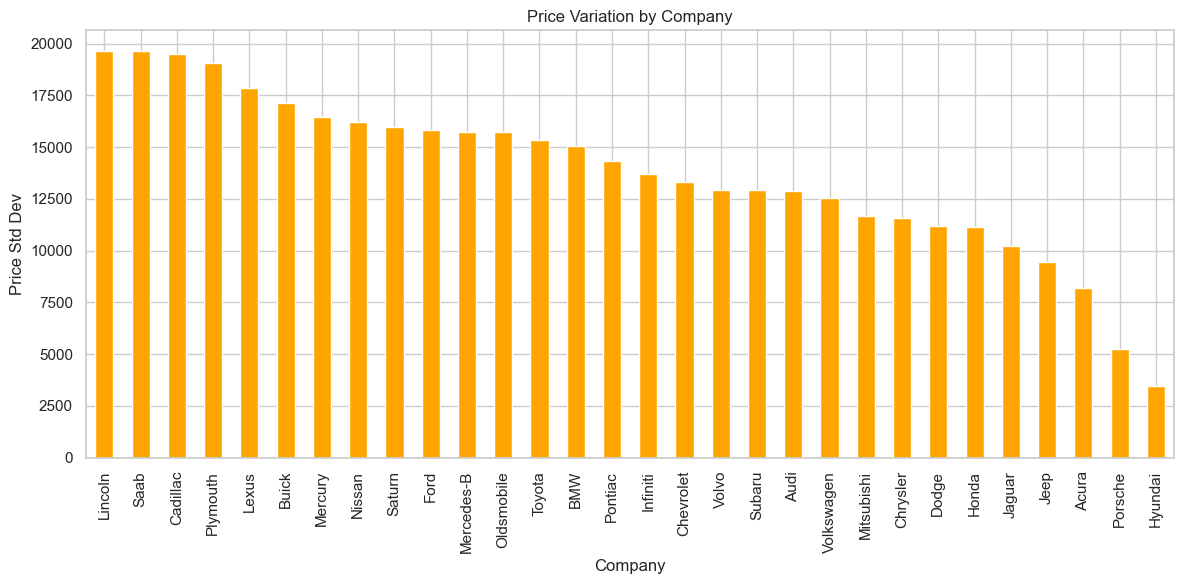

In [15]:
# ========== 2. Brand-wise Price Variation ==========
df.groupby('Company')['Price ($)'].std().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Price Variation by Company')
plt.ylabel('Price Std Dev')
plt.tight_layout()
plt.show()

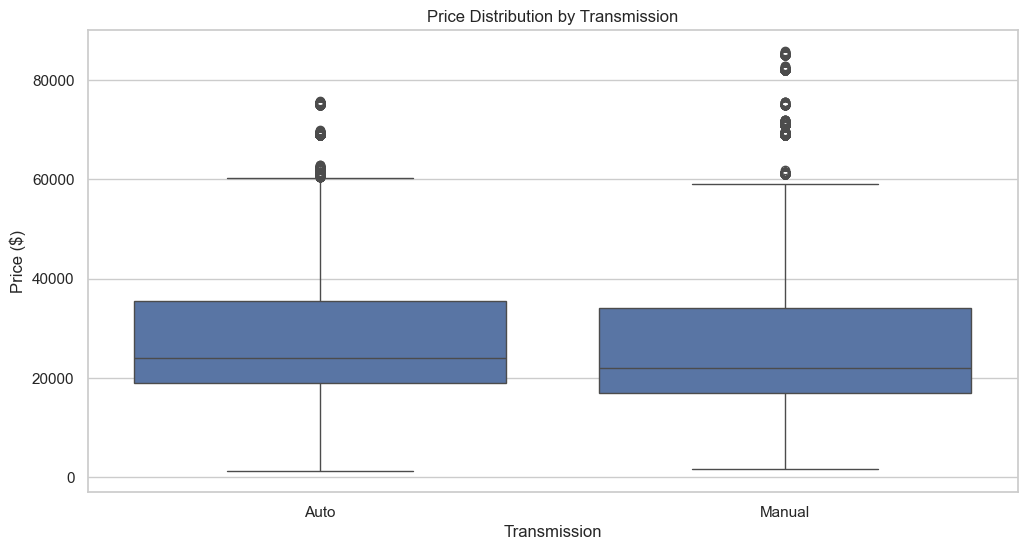

In [16]:
# ========== 3. Price Distribution by Transmission ==========
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title('Price Distribution by Transmission')
plt.show()

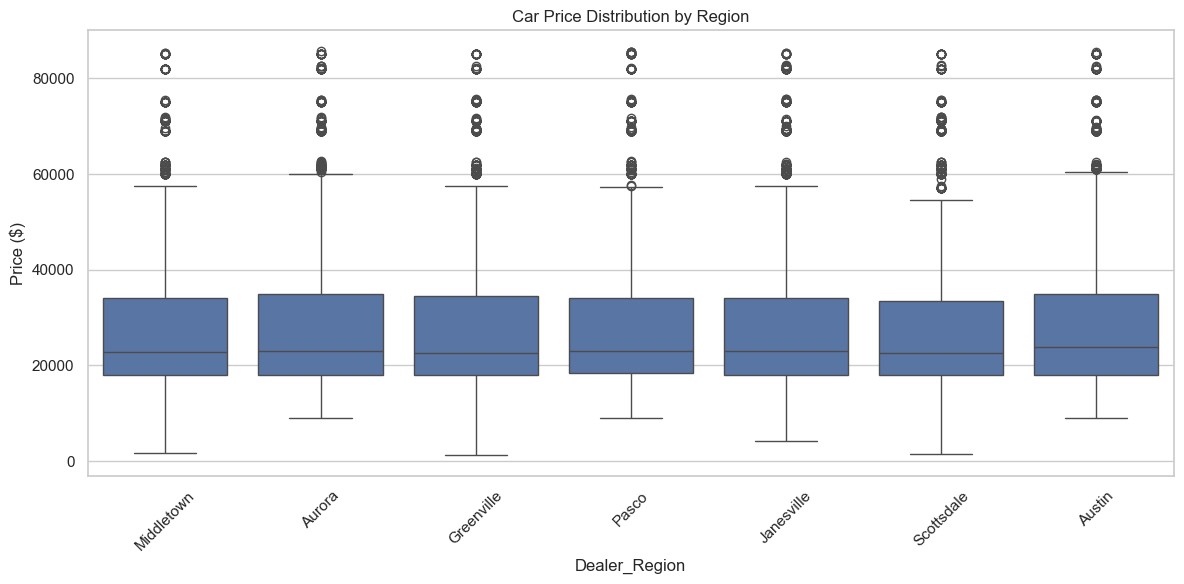

In [17]:
# ========== 4. Price Distribution by Region ==========
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Region')
plt.tight_layout()
plt.show()

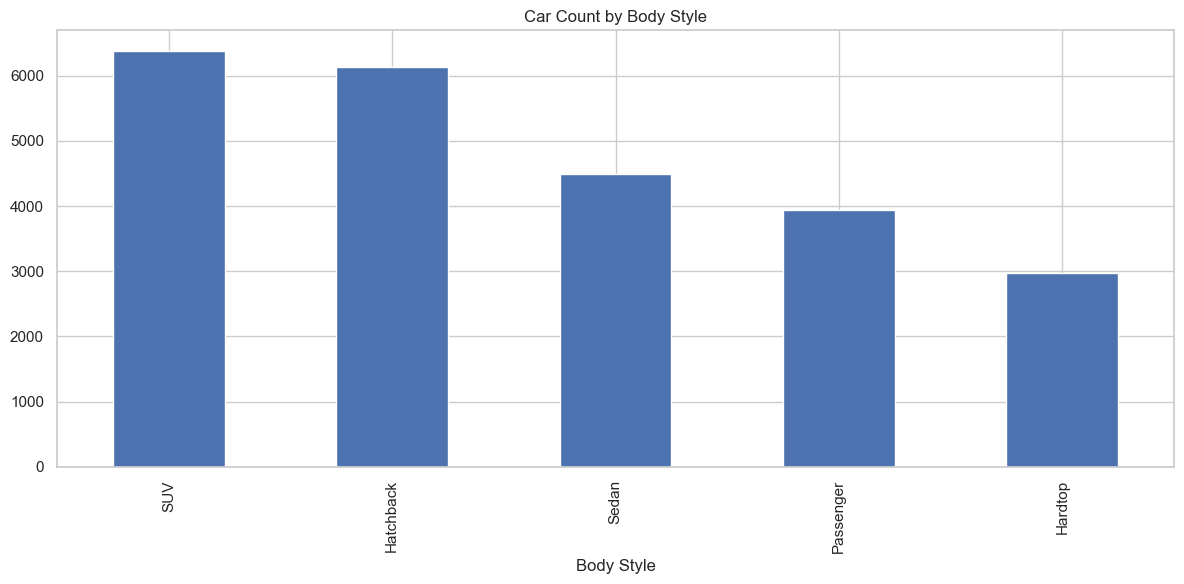

In [18]:
# ========== 5. Distribution of Cars by Body Style ==========
df['Body Style'].value_counts().plot(kind='bar')
plt.title('Car Count by Body Style')
plt.tight_layout()
plt.show()

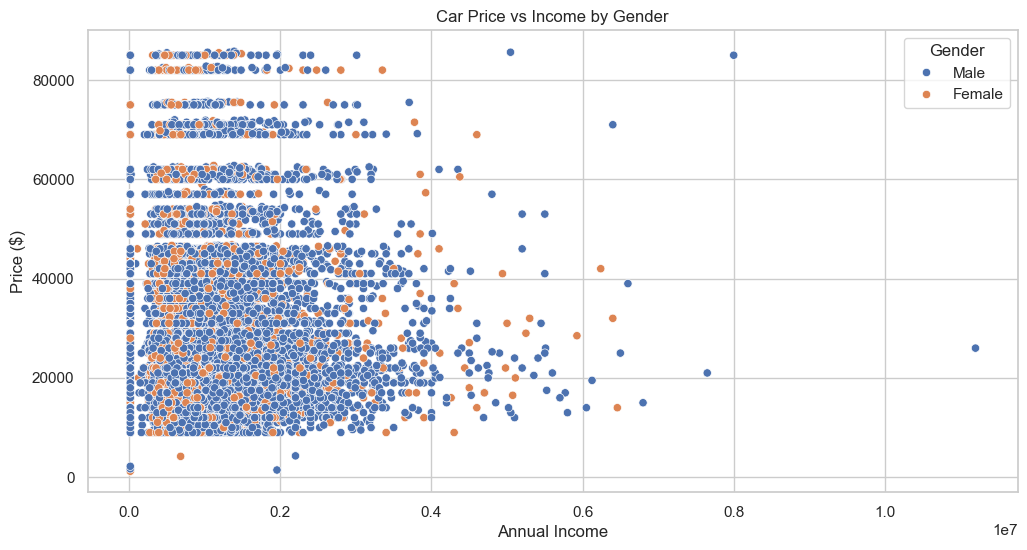

In [19]:
# ========== 6. Avg Price by Gender and Income ==========
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Gender')
plt.title('Car Price vs Income by Gender')
plt.show()

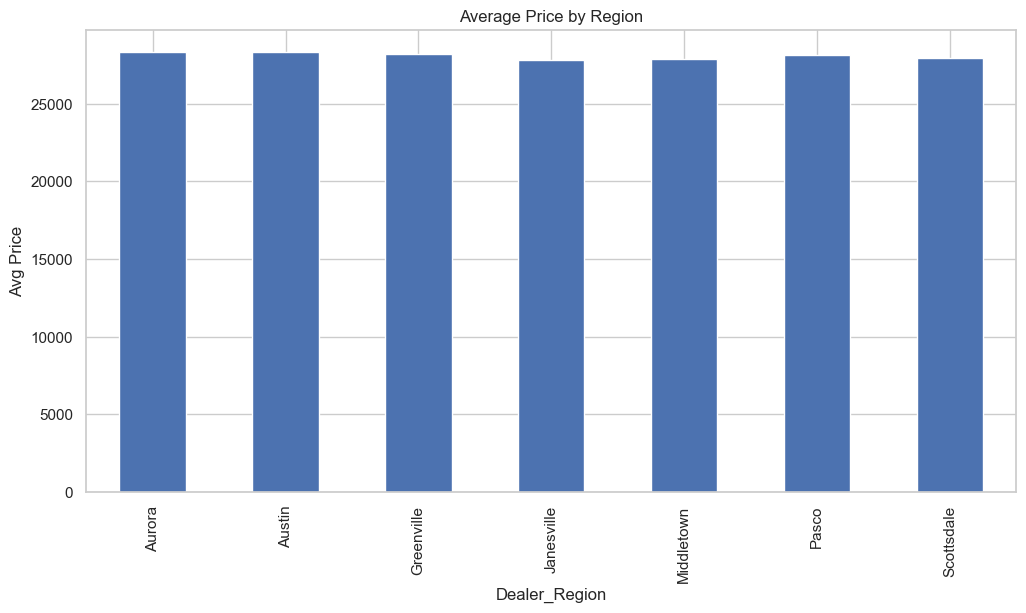

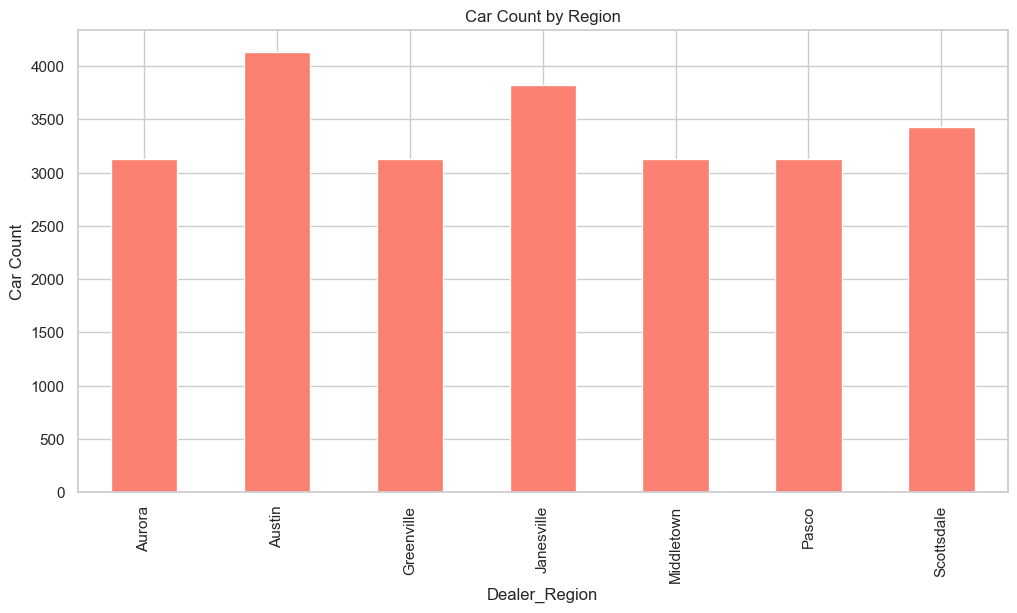

In [20]:
# ========== 7. Regional Price and Car Sales Count ==========
region_stats = df.groupby('Dealer_Region')['Price ($)'].agg(['mean', 'count'])
region_stats['mean'].plot(kind='bar', title='Average Price by Region')
plt.ylabel('Avg Price')
plt.show()
region_stats['count'].plot(kind='bar', title='Car Count by Region', color='salmon')
plt.ylabel('Car Count')
plt.show()

In [21]:
# ========== 8. Avg Price by Engine Size ==========
df['Engine_Size'] = df['Engine'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

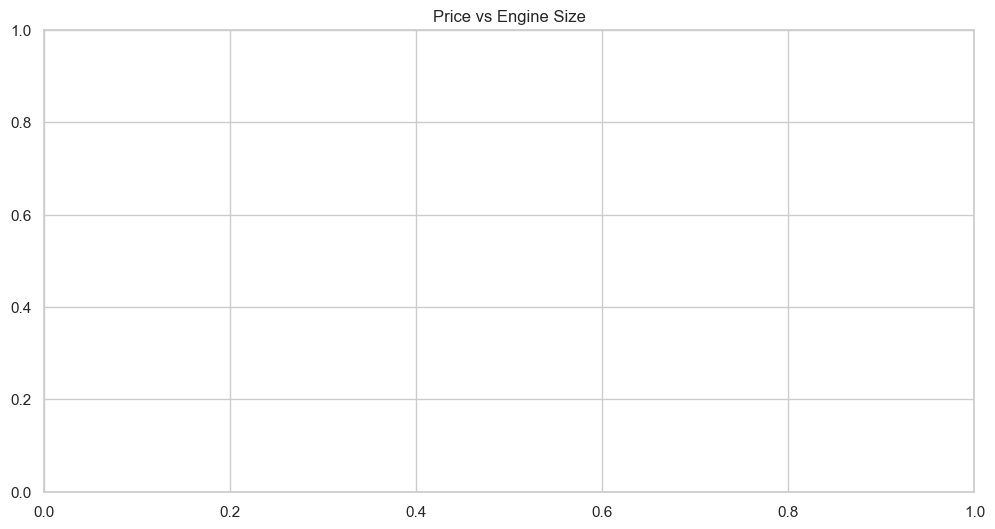

In [22]:
# Handle NaN values in Engine_Size before plotting
sns.boxplot(data=df.dropna(subset=['Engine_Size']), x='Engine_Size', y='Price ($)')
plt.title('Price vs Engine Size')
plt.show()

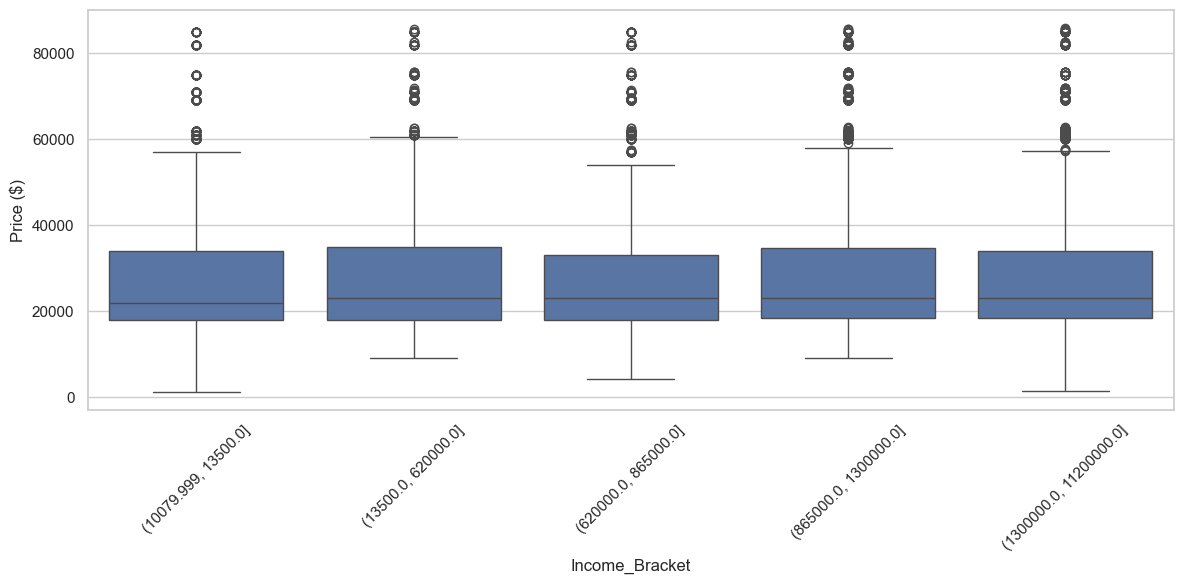

In [24]:
# ========== 9. Price by Income Brackets ==========
df['Income_Bracket'] = pd.qcut(df['Annual Income'], 5)
sns.boxplot(data=df, x='Income_Bracket', y='Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

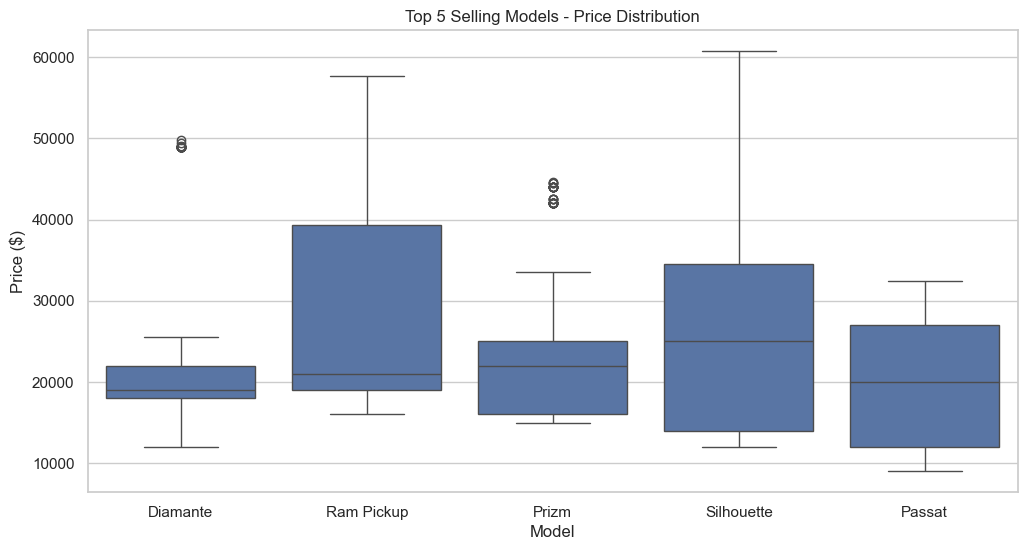

In [25]:
# ========== 10. Top 5 Models by Sales + Price Distribution ==========
top_models = df['Model'].value_counts().nlargest(5).index
sns.boxplot(data=df[df['Model'].isin(top_models)], x='Model', y='Price ($)')
plt.title('Top 5 Selling Models - Price Distribution')
plt.show()

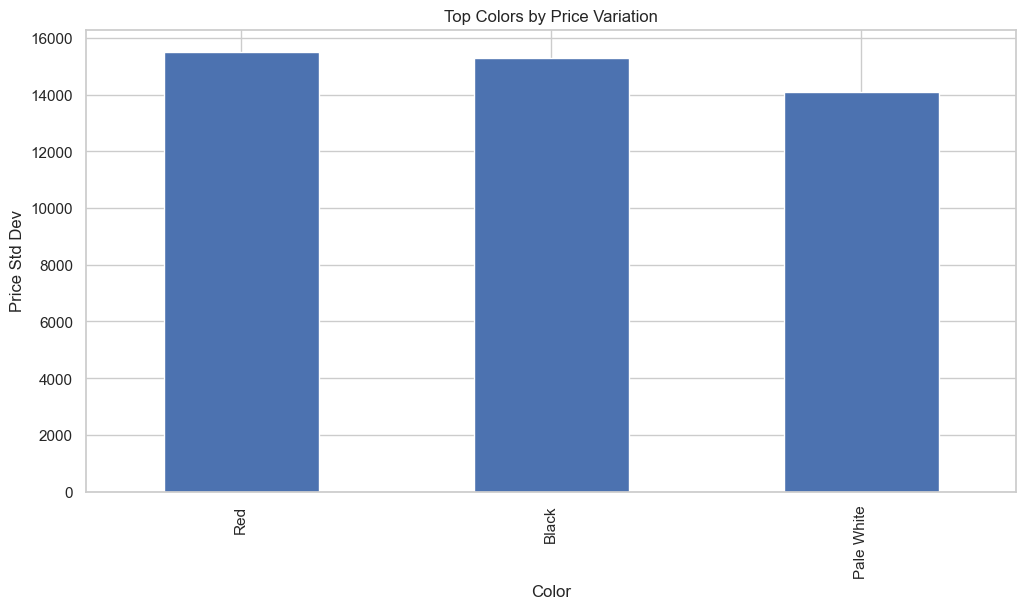

In [26]:
# ========== 11. Price vs Engine Size Across Colors ==========
color_var = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
color_var.head(10).plot(kind='bar', title='Top Colors by Price Variation')
plt.ylabel('Price Std Dev')
plt.show()

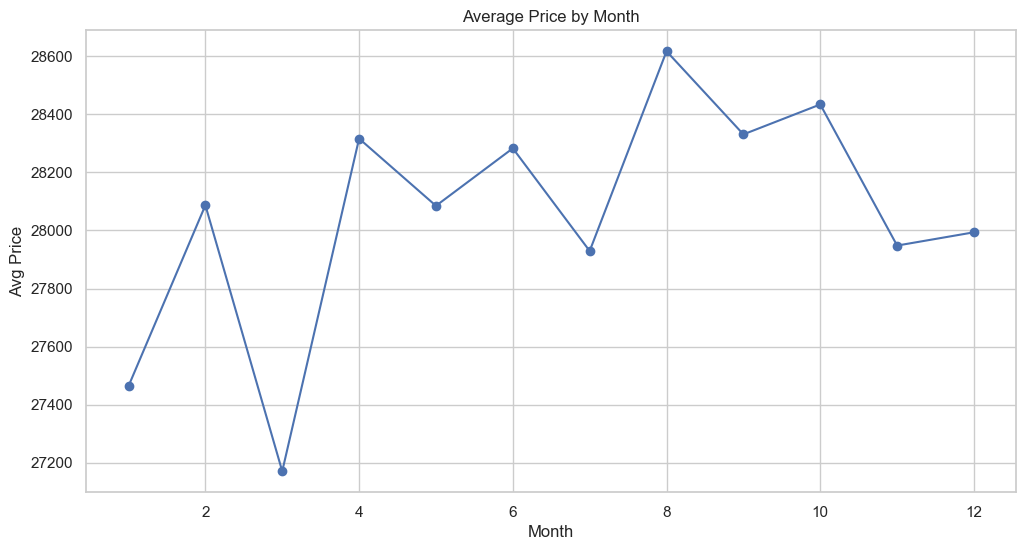

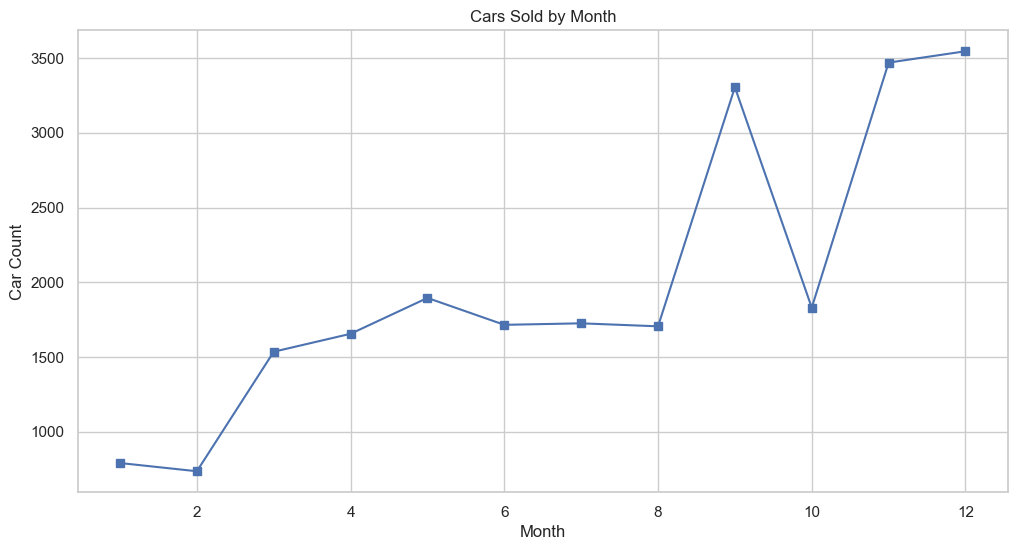

In [27]:
# ========== 12. Seasonal Trends by Sale Date ==========
df['Month'] = df['Date'].dt.month
monthly = df.groupby('Month')['Price ($)'].agg(['mean', 'count'])
monthly['mean'].plot(marker='o', title='Average Price by Month')
plt.ylabel('Avg Price')
plt.show()
monthly['count'].plot(marker='s', title='Cars Sold by Month')
plt.ylabel('Car Count')
plt.show()

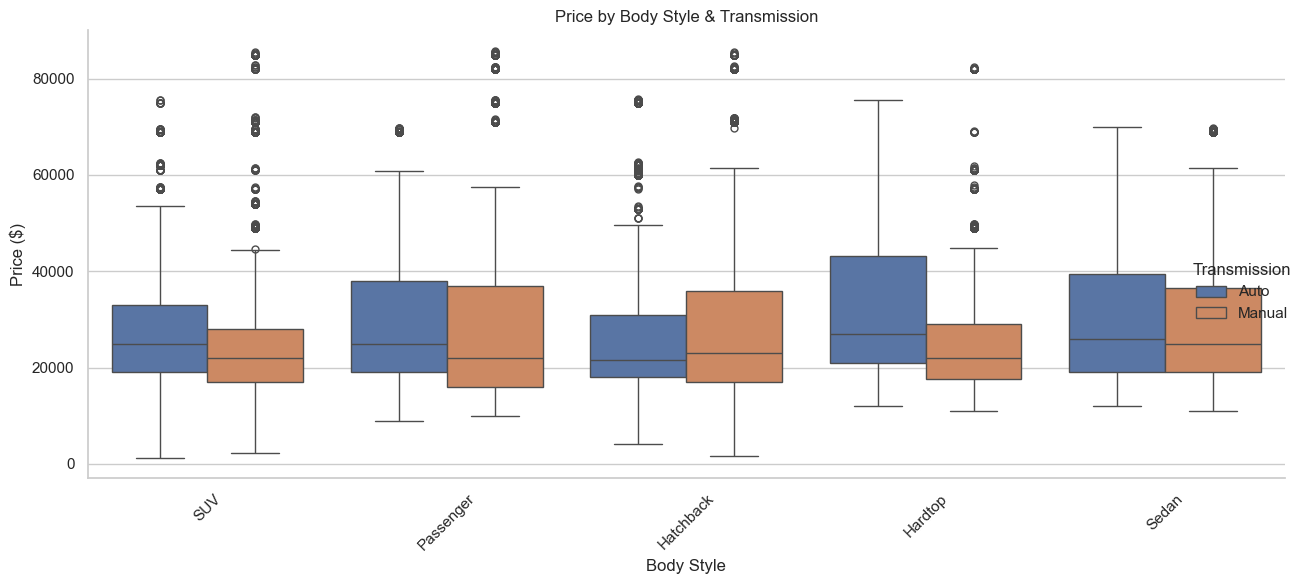

In [29]:
# ========== 13. Price by Body Style and Transmission ==========
sns.catplot(data=df, x='Body Style', y='Price ($)', hue='Transmission', kind='box', height=6, aspect=2)
plt.title('Price by Body Style & Transmission')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

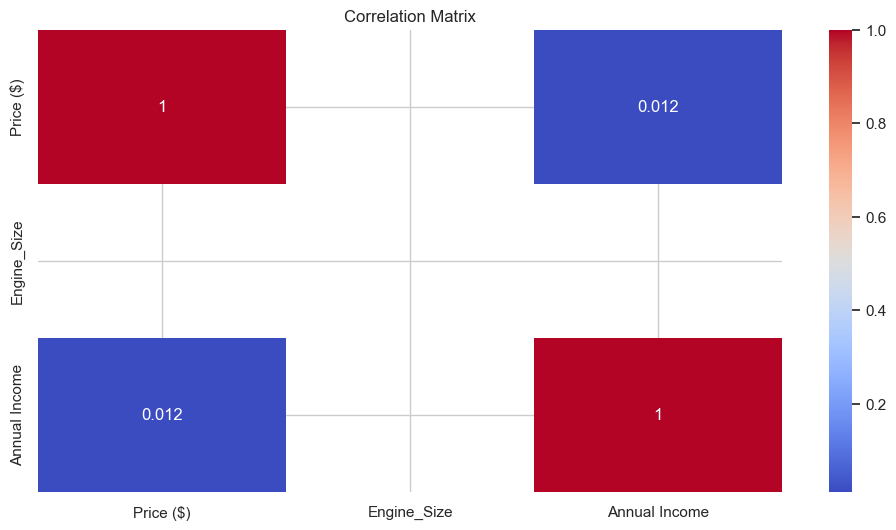

In [30]:
# ========== 14. Correlation: Price, Engine, Income ==========
sns.heatmap(df[['Price ($)', 'Engine_Size', 'Annual Income']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

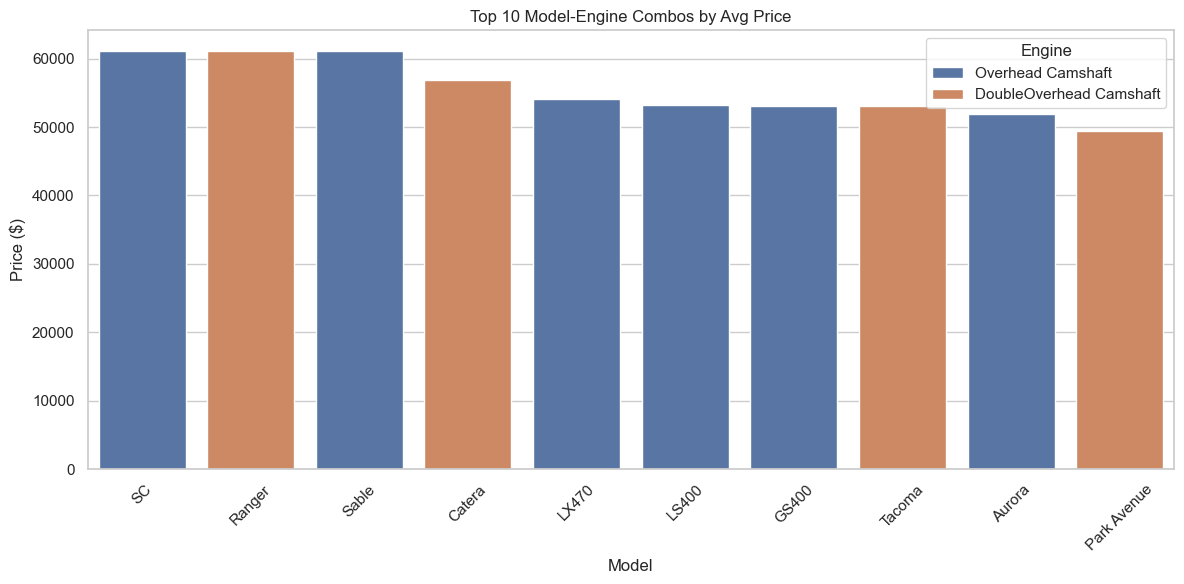

In [31]:
# ========== 15. Avg Price by Car Model and Engine Type ==========
avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
top_model_engines = avg_price.sort_values('Price ($)', ascending=False).head(10)
sns.barplot(data=top_model_engines, x='Model', y='Price ($)', hue='Engine')
plt.title('Top 10 Model-Engine Combos by Avg Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()